# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [25]:
df.columns=['Signal',"Density"]

In [26]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

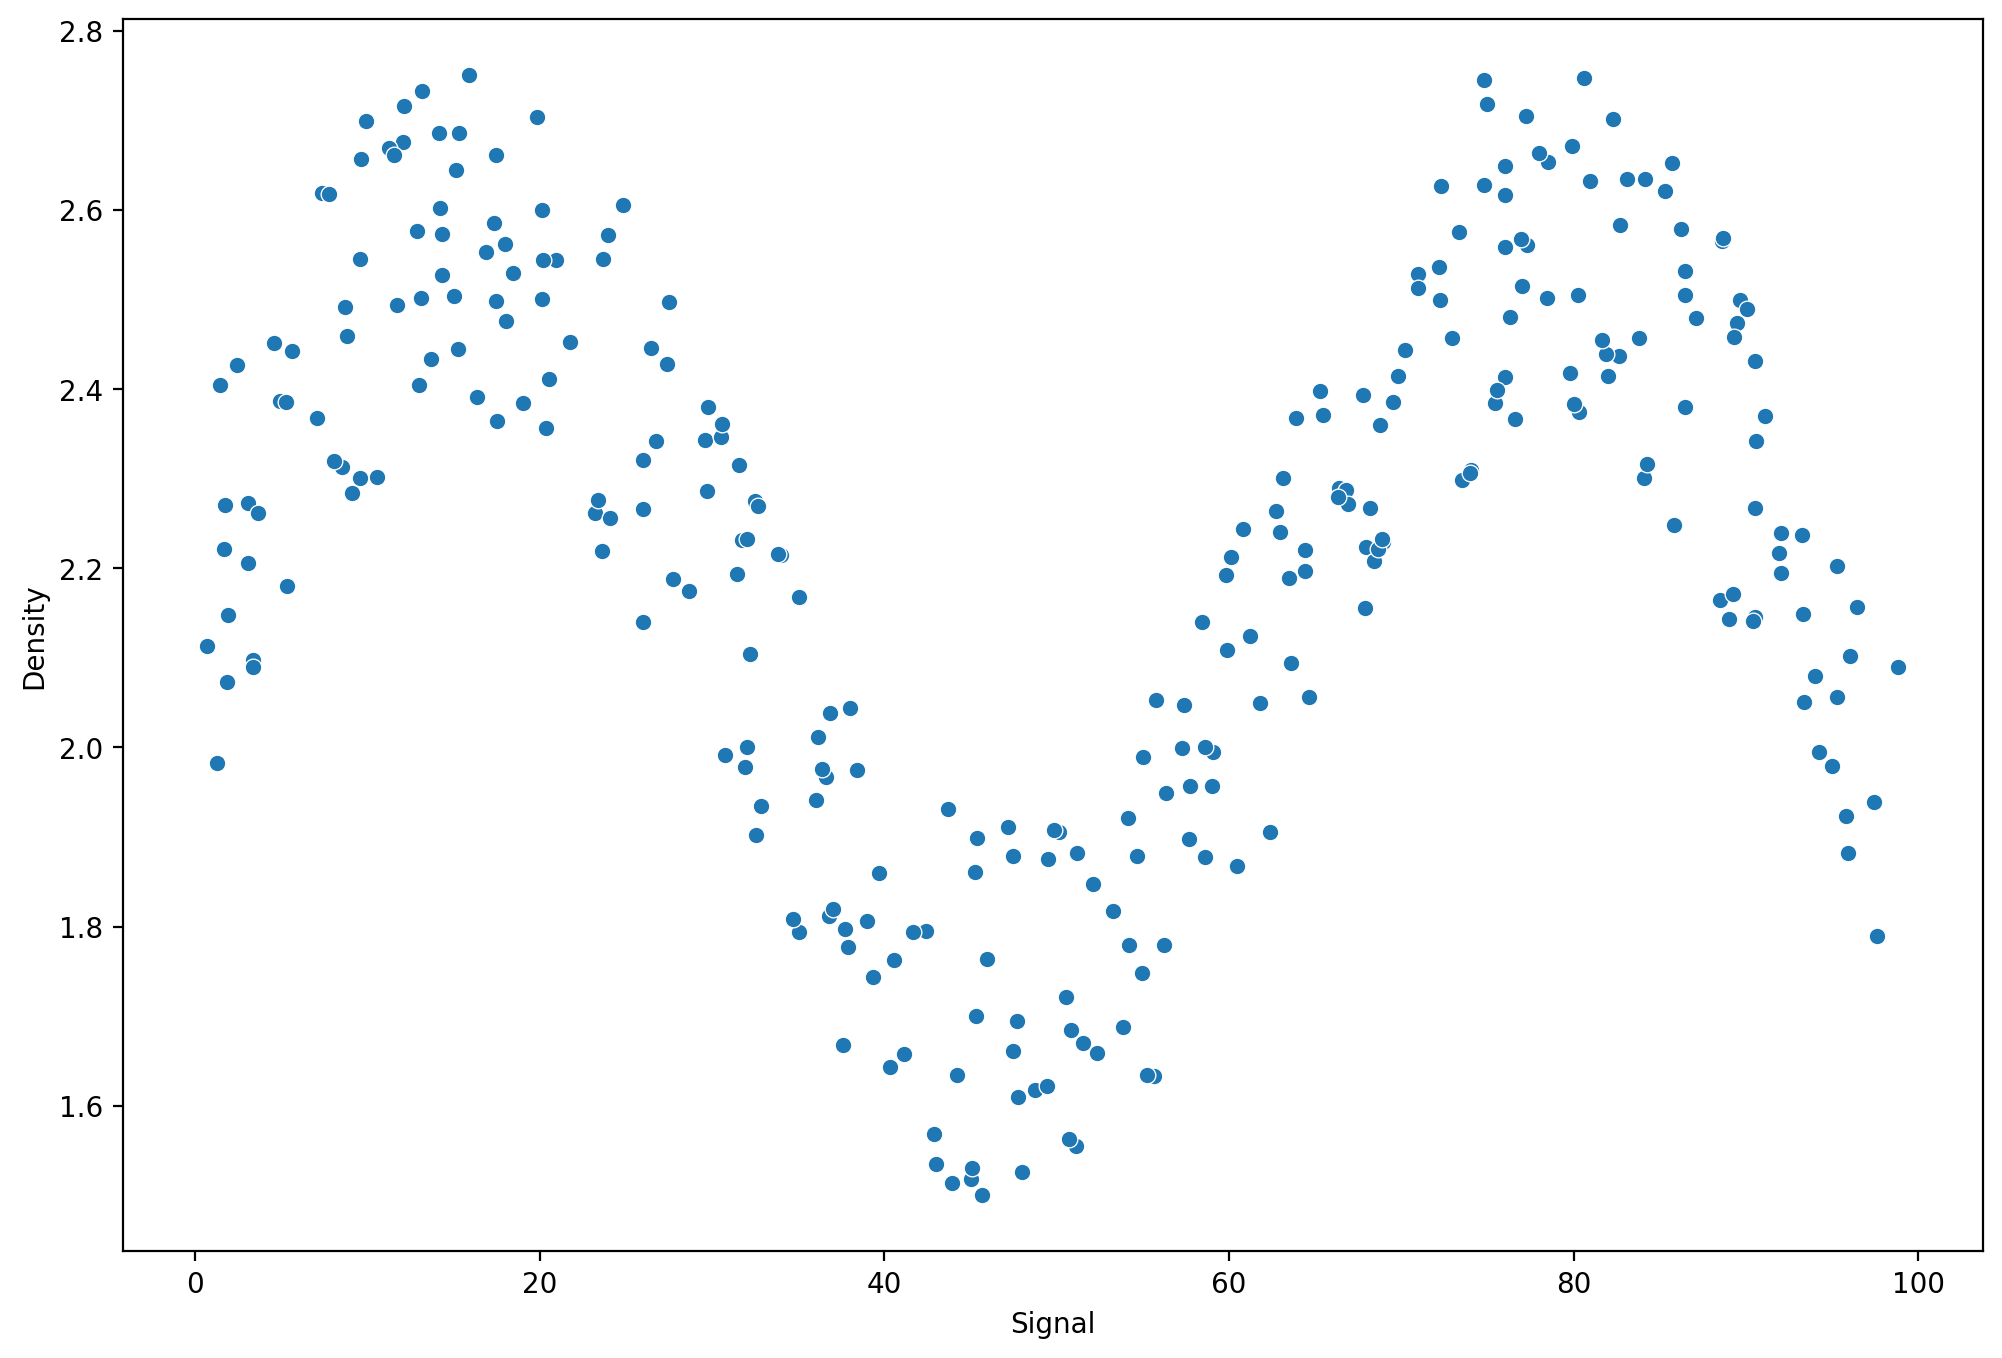

In [6]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [44]:
X = df['Signal'].values.reshape(-1,1)

In [45]:
X.shape

(300, 1)

In [46]:
X

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708],
       [89.64797256],
       [69.49273293],
       [20.15052036],
       [82.25633703],
       [64.42480217],
       [38.42706534],
       [ 9.89157994],
       [31.7410984 ],
       [90.4960676 ],
       [13.19342555],
       [ 9.55665673],
       [26.00550577],
       [24.81782725],
       [40.29631043],
       [29.60926638],
       [76.57740035],
       [82.61598742],
       [ 1.66229161],
       [17.32519267],
       [35.05157441],
       [63.47748521],
       [13.68823691],
       [17.49779896],
       [ 1.86382485],
       [17.96684624],
       [23.9388581 ],
       [66.36433682],
       [34.02717884],
       [76.03302052],
       [82.66759709],
       [66.78076834],
       [47.4528517 ],
       [74.02752794],
       [86.20473574],
       [72.24767039],
       [80.33899095],
       [36.86719496],
       [31.92883259],
       [85.68535822],
       [78.45459768],
       [19

In [47]:
y=df['Density']

In [48]:
y.shape

(300,)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr_model = LinearRegression()

In [53]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [54]:
lr_preds = lr_model.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

What does the fit look like?

In [57]:
signal_range = np.arange(0,100)

In [58]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

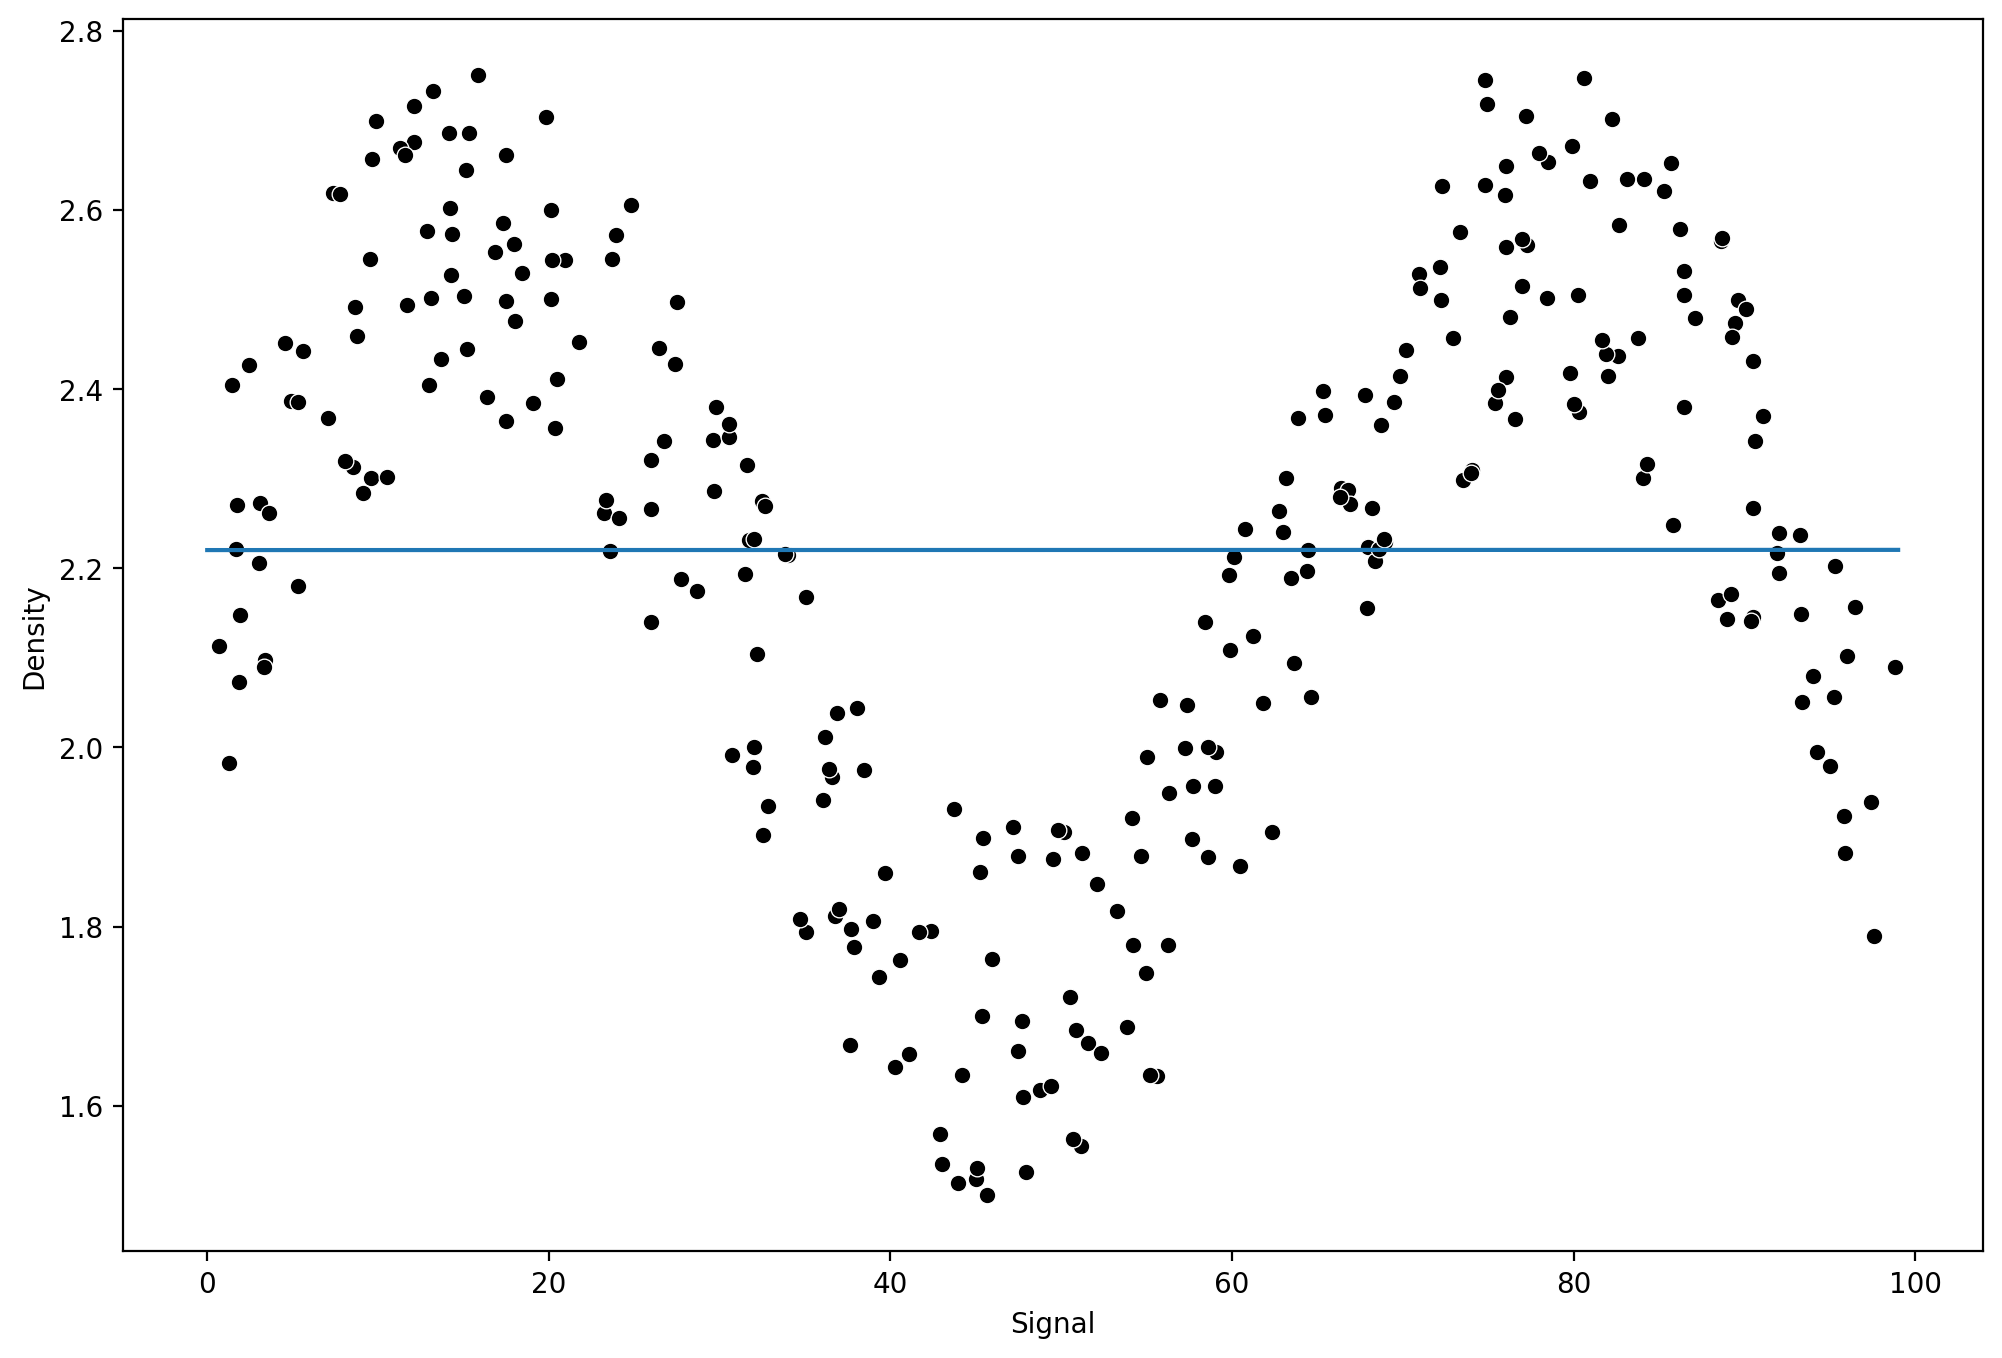

In [59]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Polynomial Regression

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


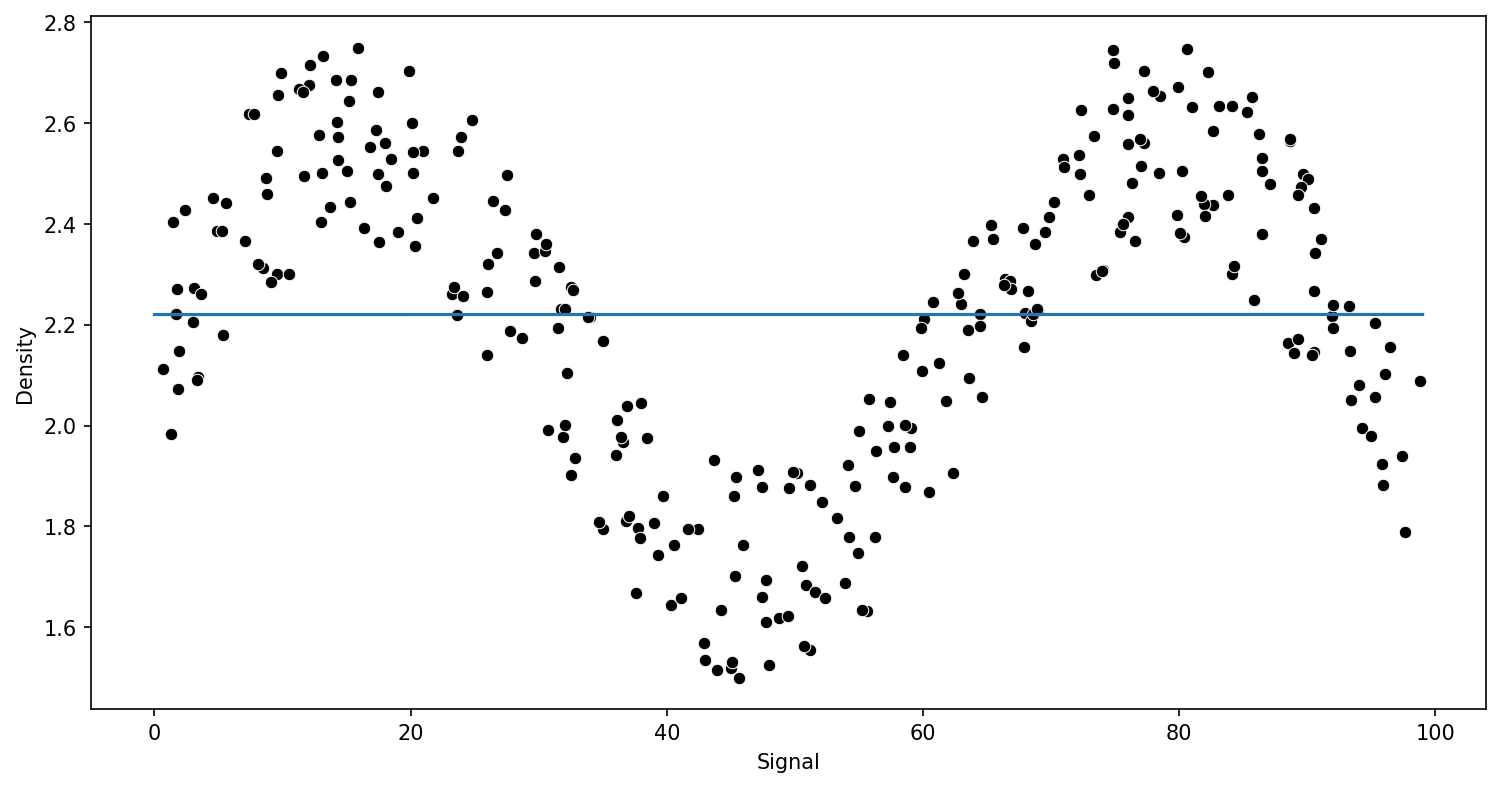

In [68]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [64]:
from sklearn.pipeline import make_pipeline

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.28173095637255463


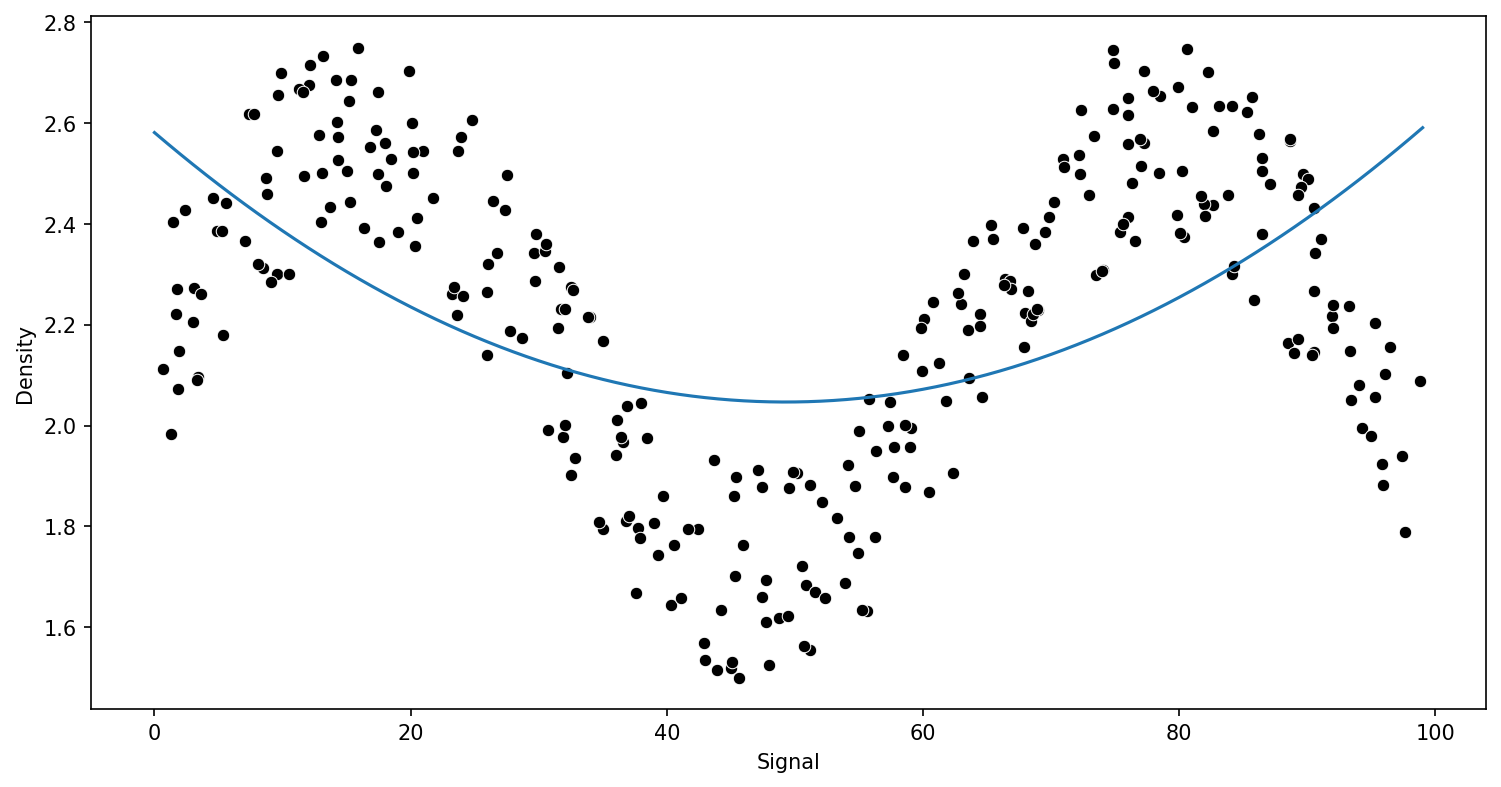

In [70]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

RMSE : 0.14034544477139238


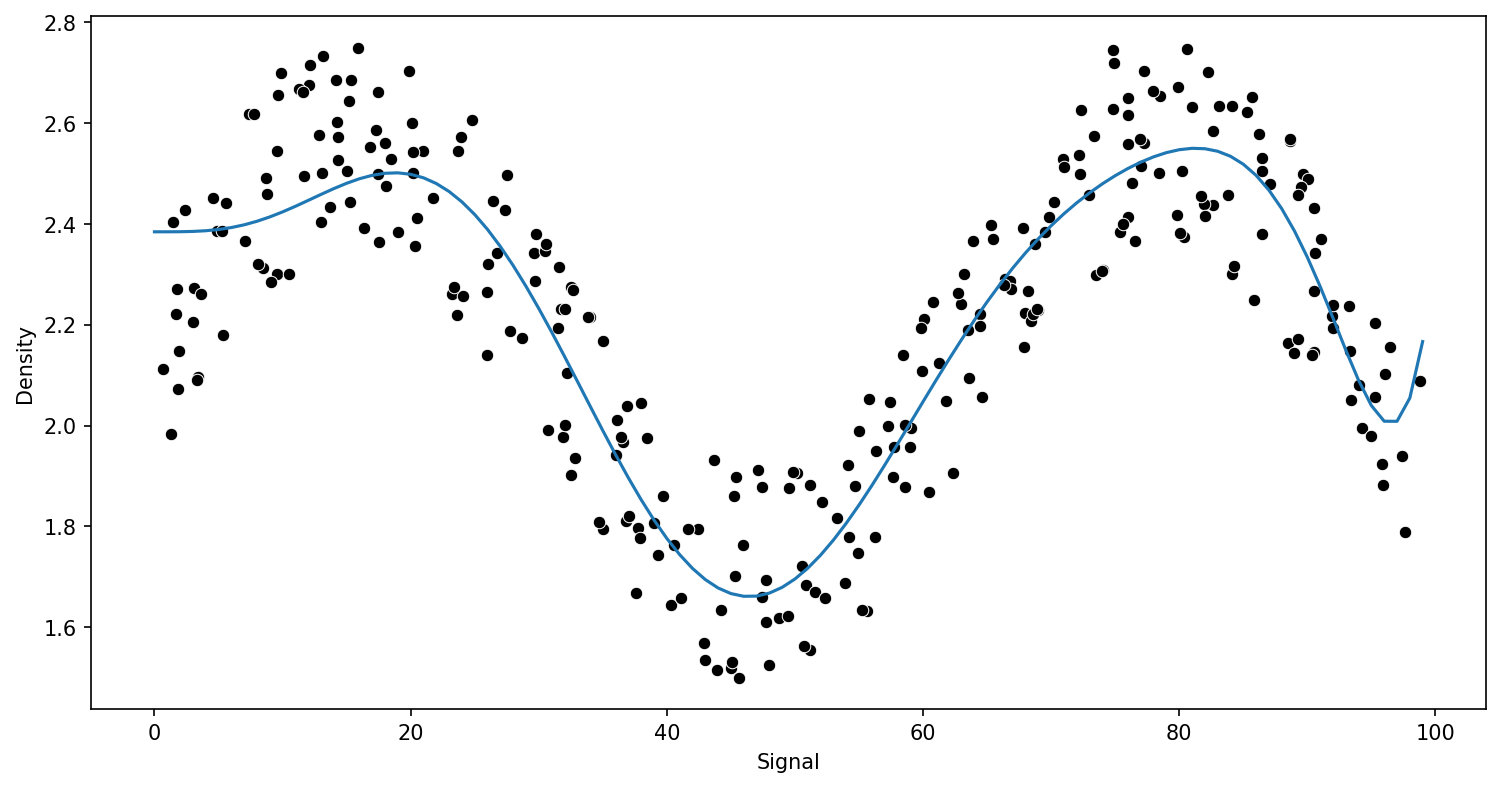

In [71]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [273]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


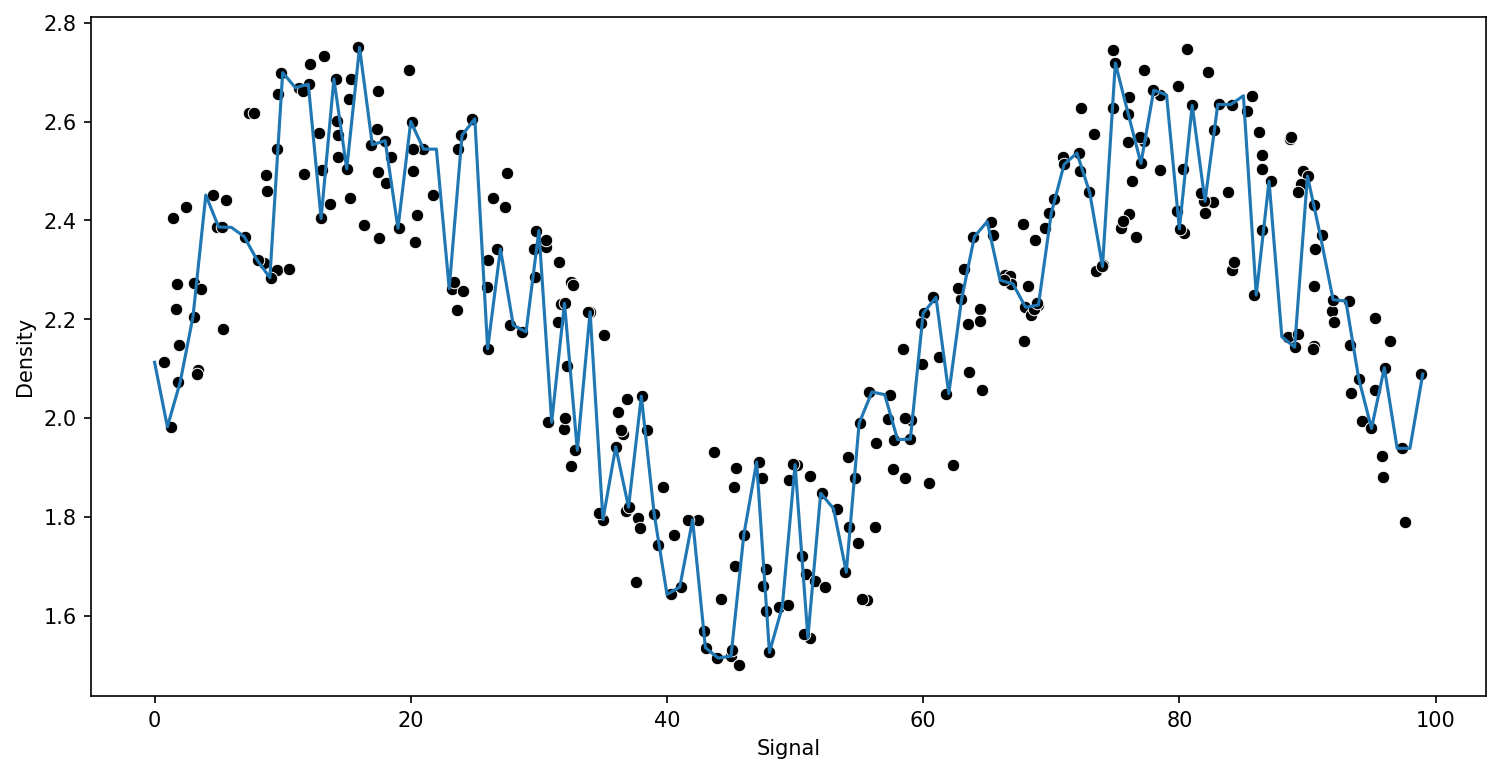

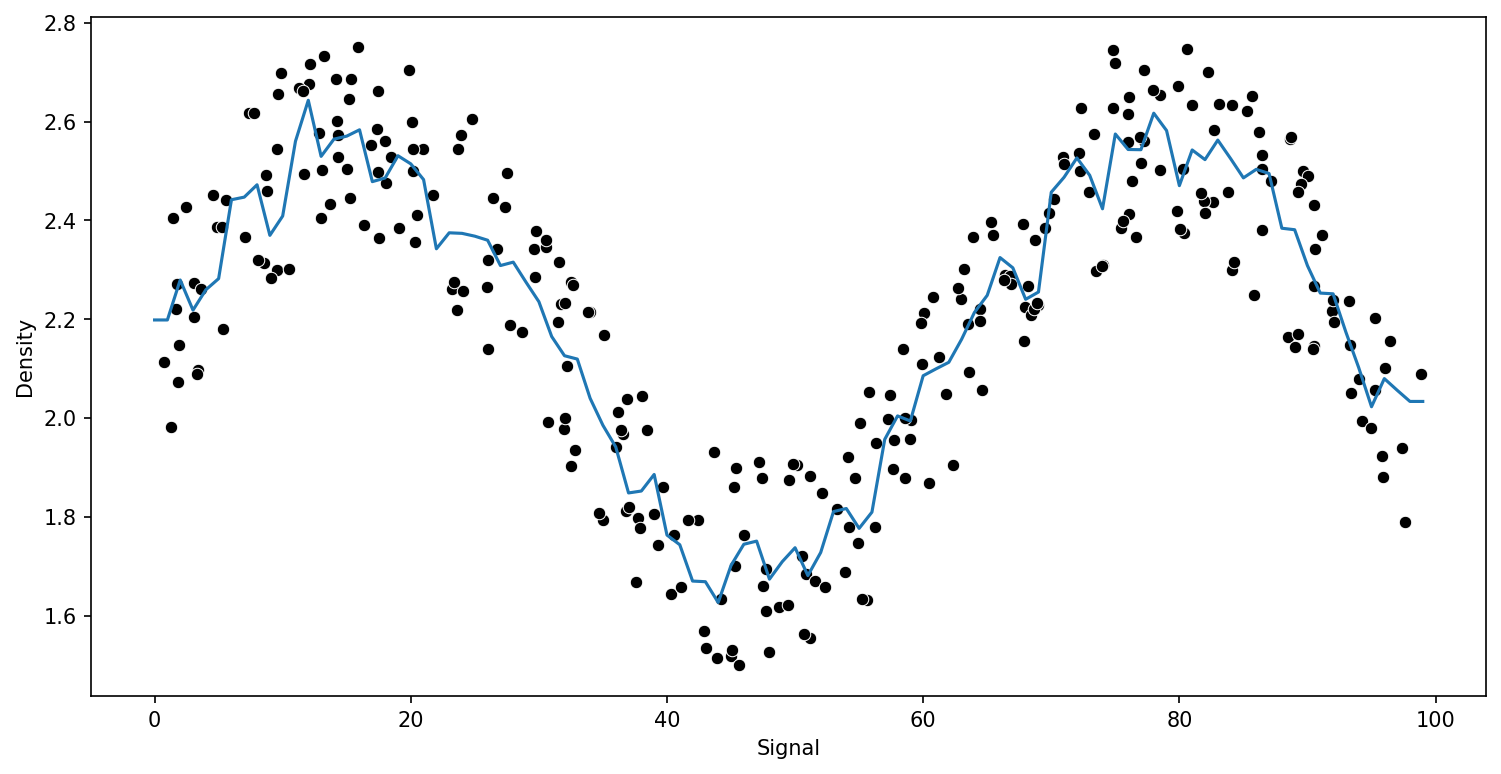

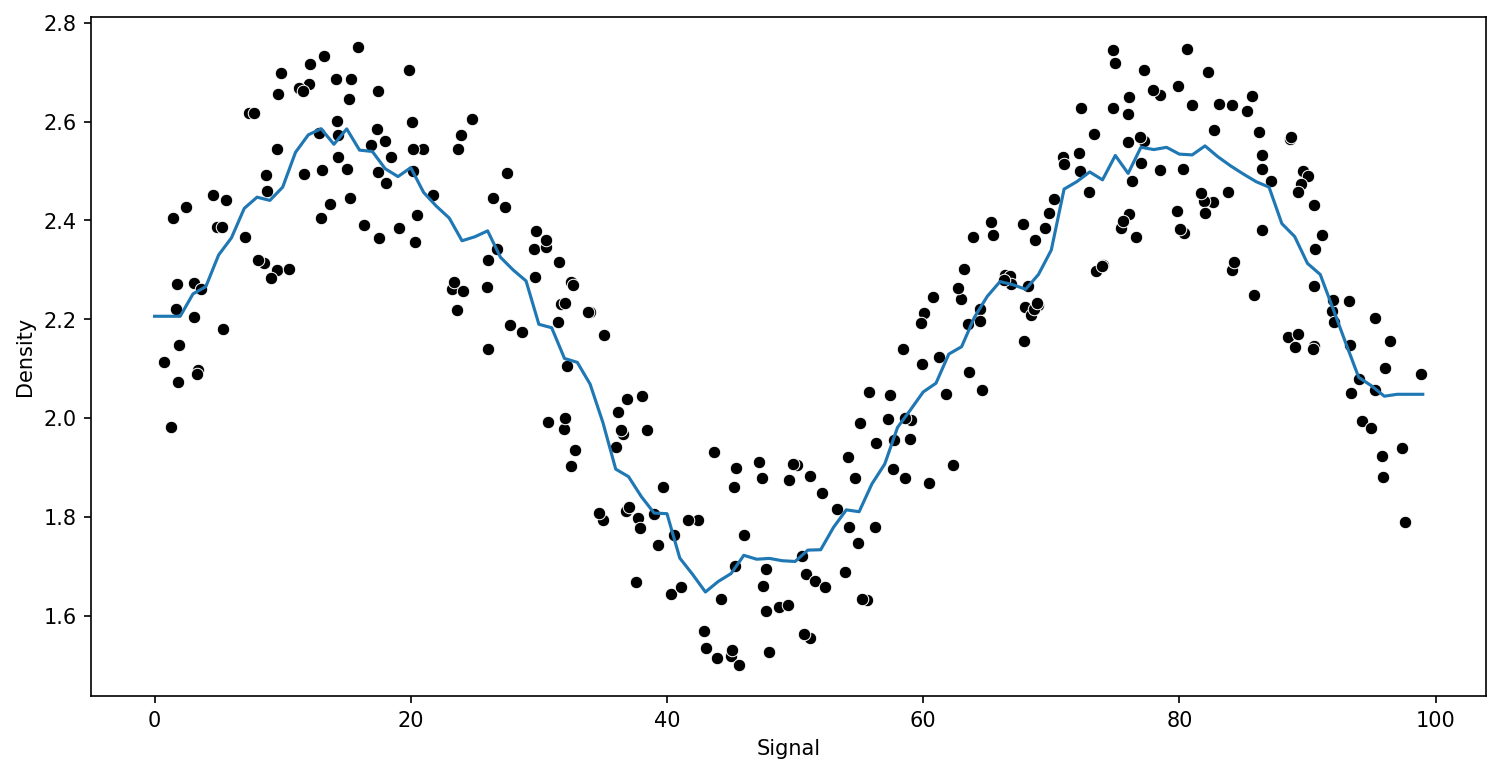

In [274]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


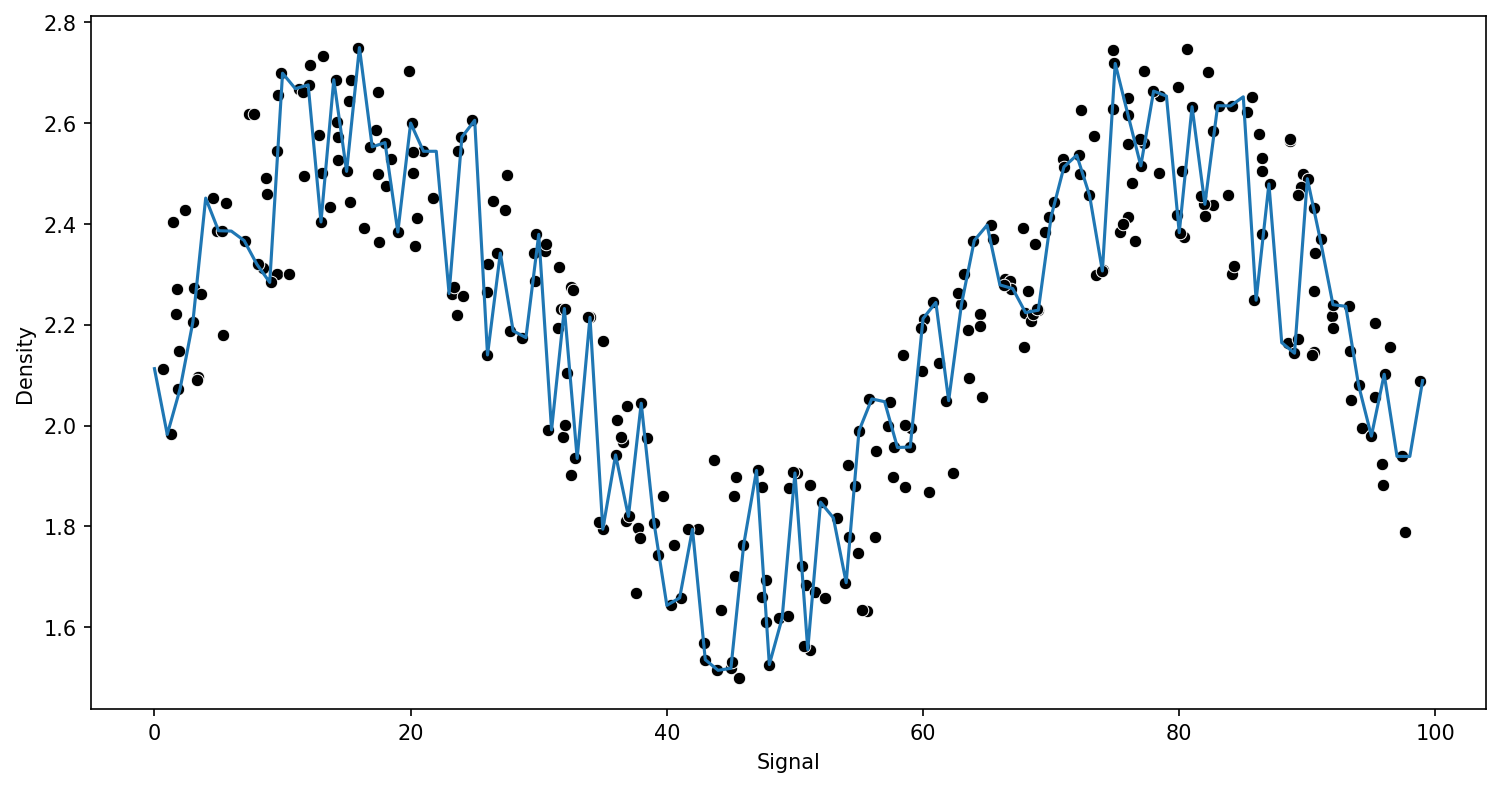

In [73]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [74]:
model.get_n_leaves()

270

----

## Support Vector Regression

In [75]:
from sklearn.svm import SVR

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [78]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


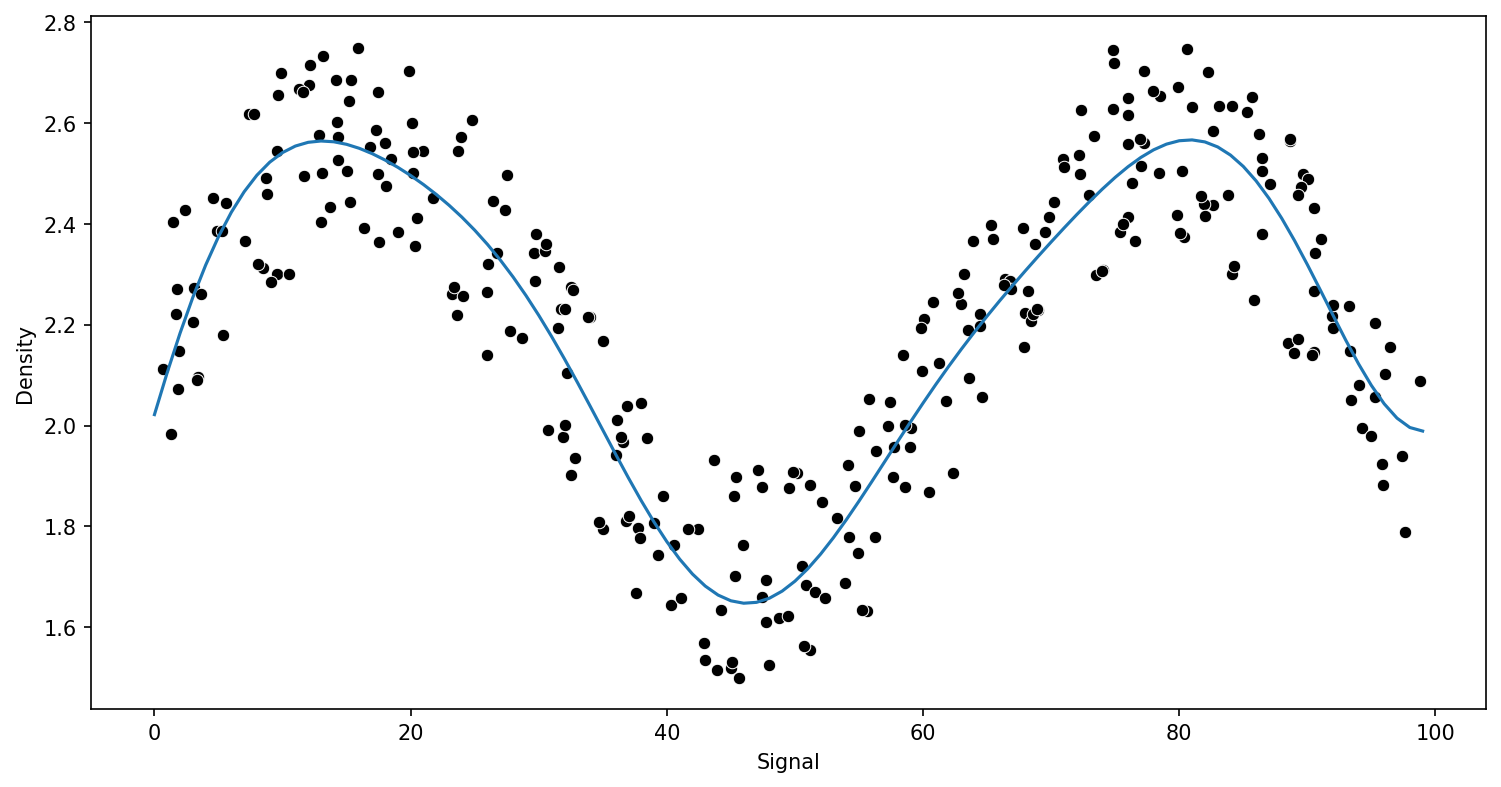

In [79]:
run_model(grid,X_train,y_train,X_test,y_test)

In [287]:
grid.best_estimator_

SVR(C=1000)

---

## Random Forest Regression

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
# help(RandomForestRegressor)

RMSE : 0.13100950424970156
RMSE : 0.14043691149066367
RMSE : 0.13498725000038075


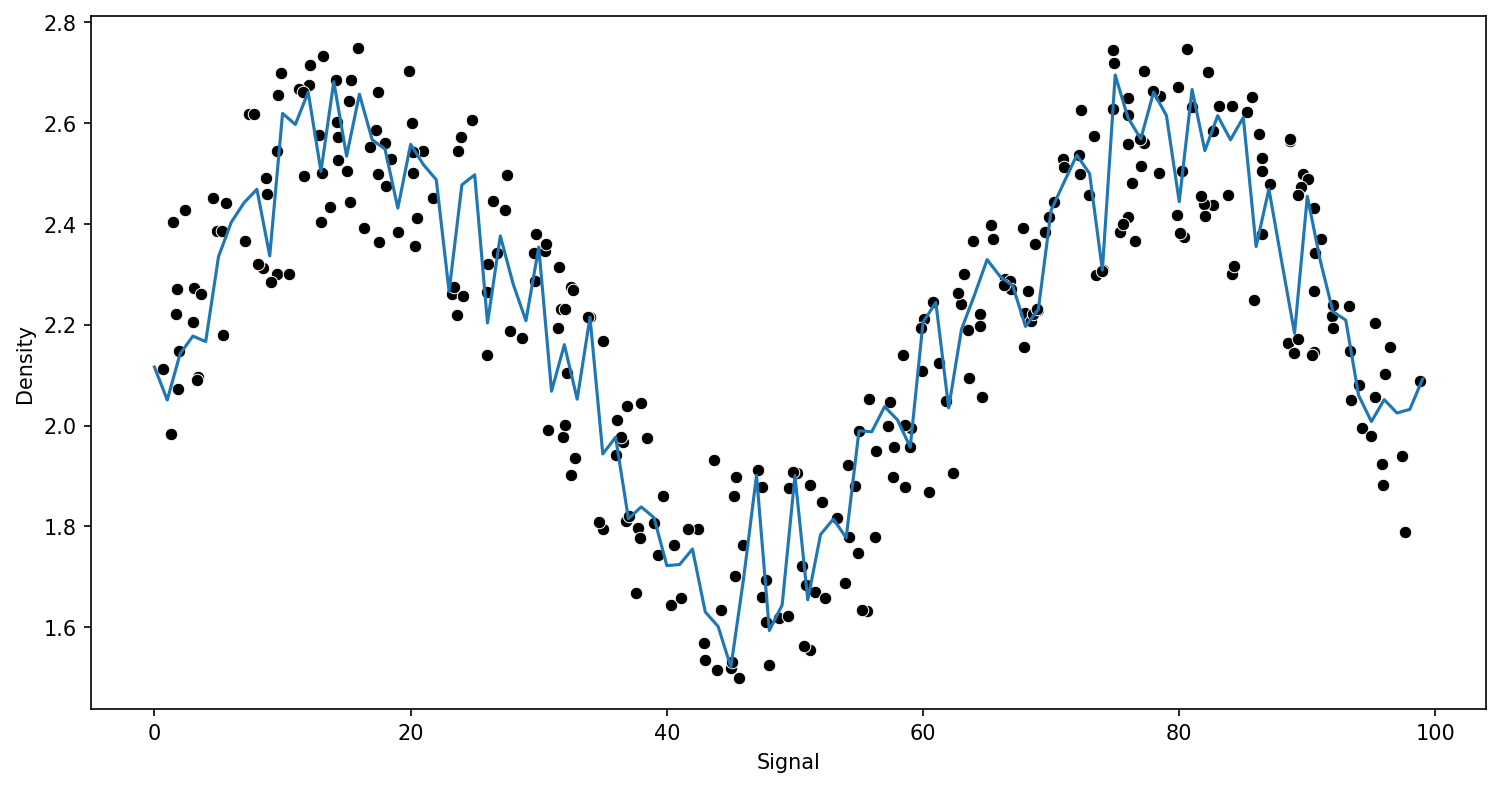

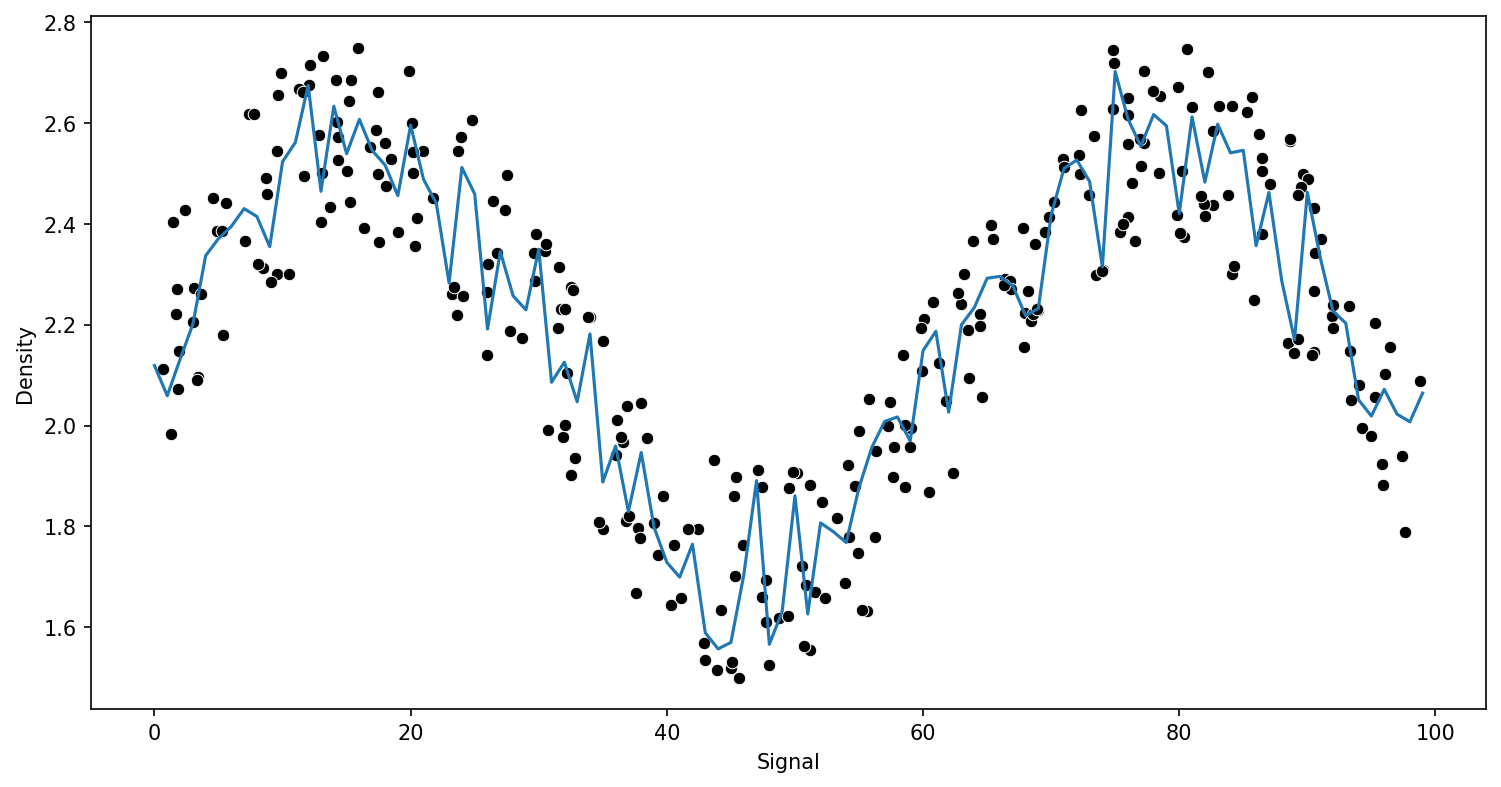

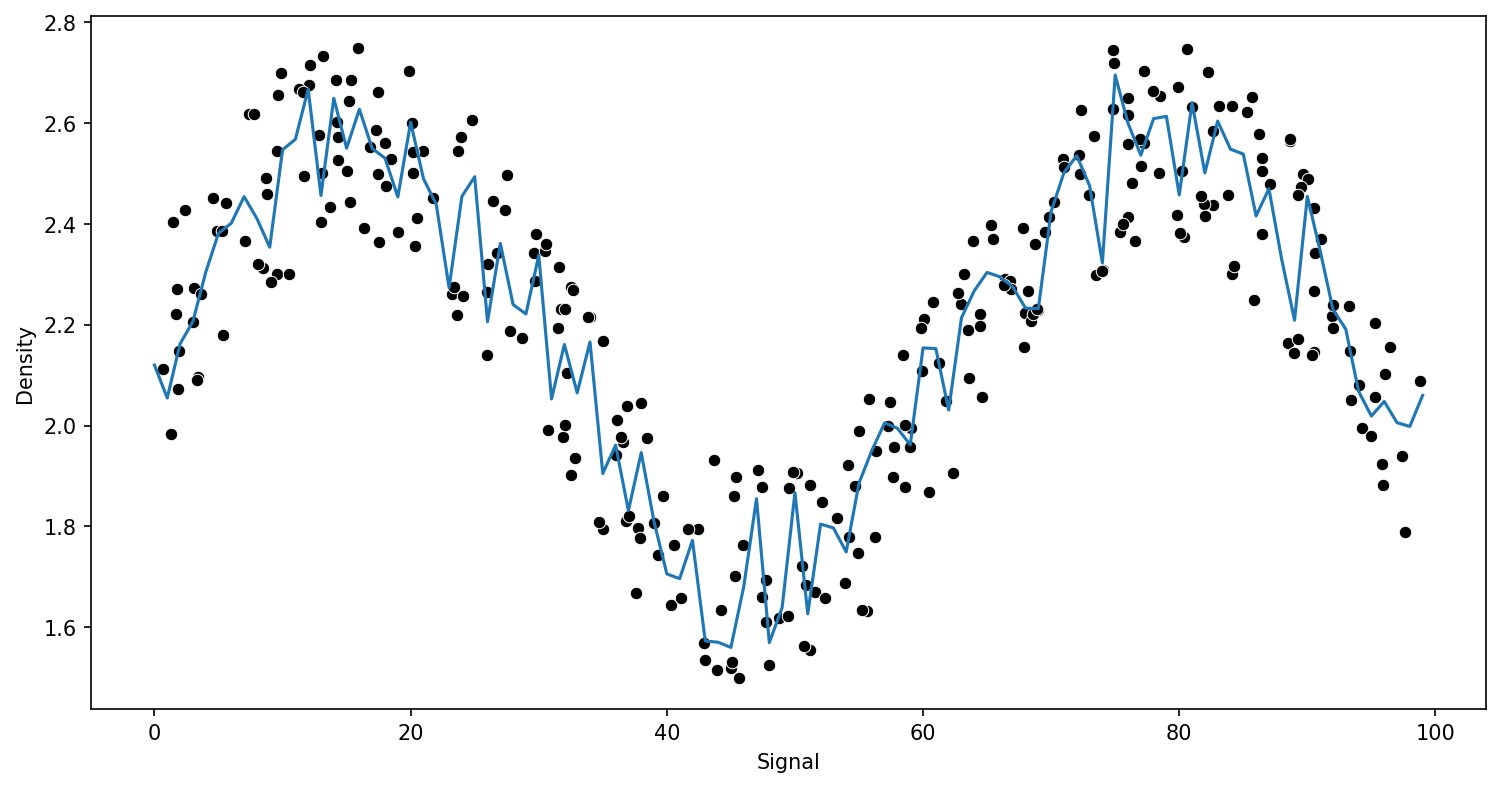

In [82]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [291]:
from sklearn.ensemble import GradientBoostingRegressor

In [292]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


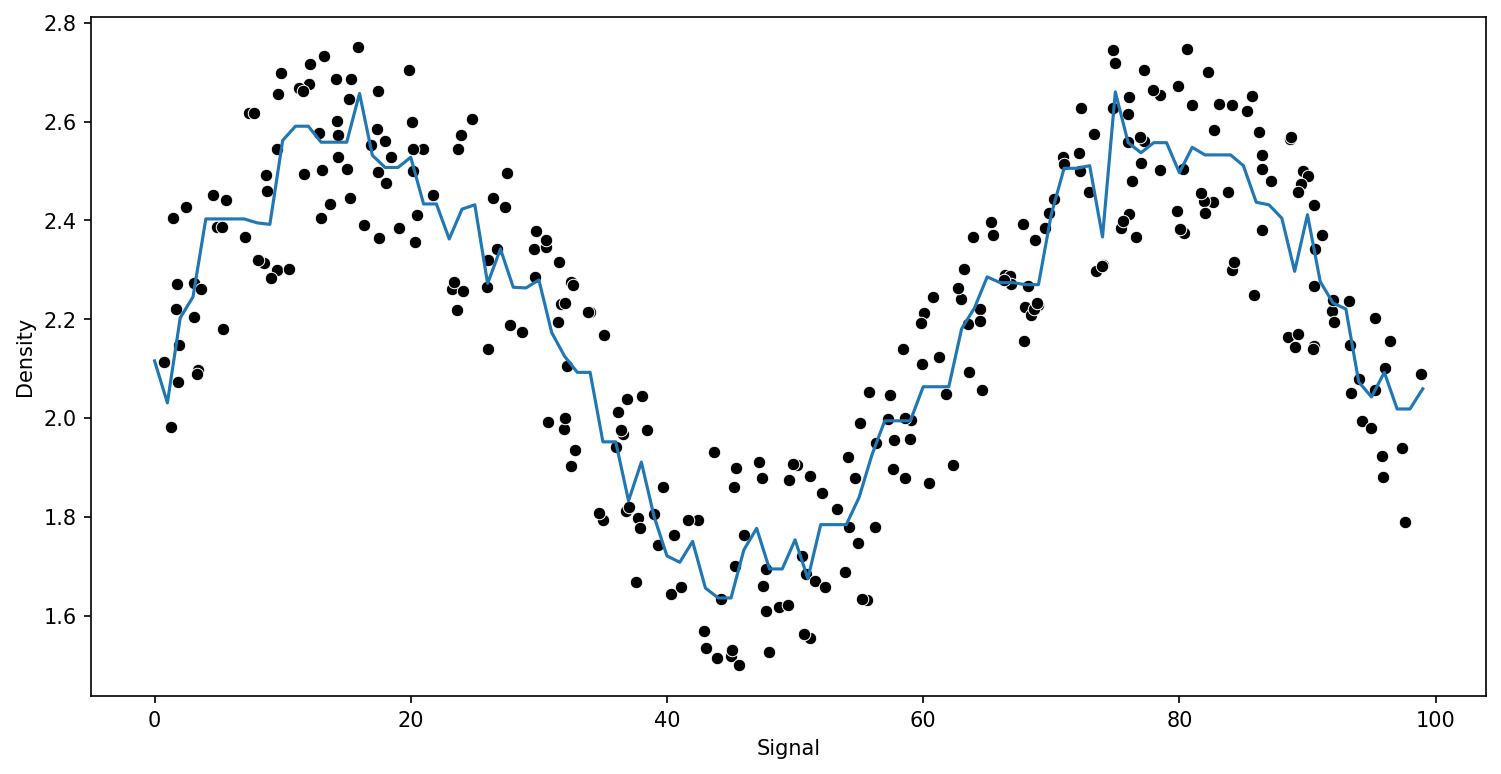

In [293]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [294]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


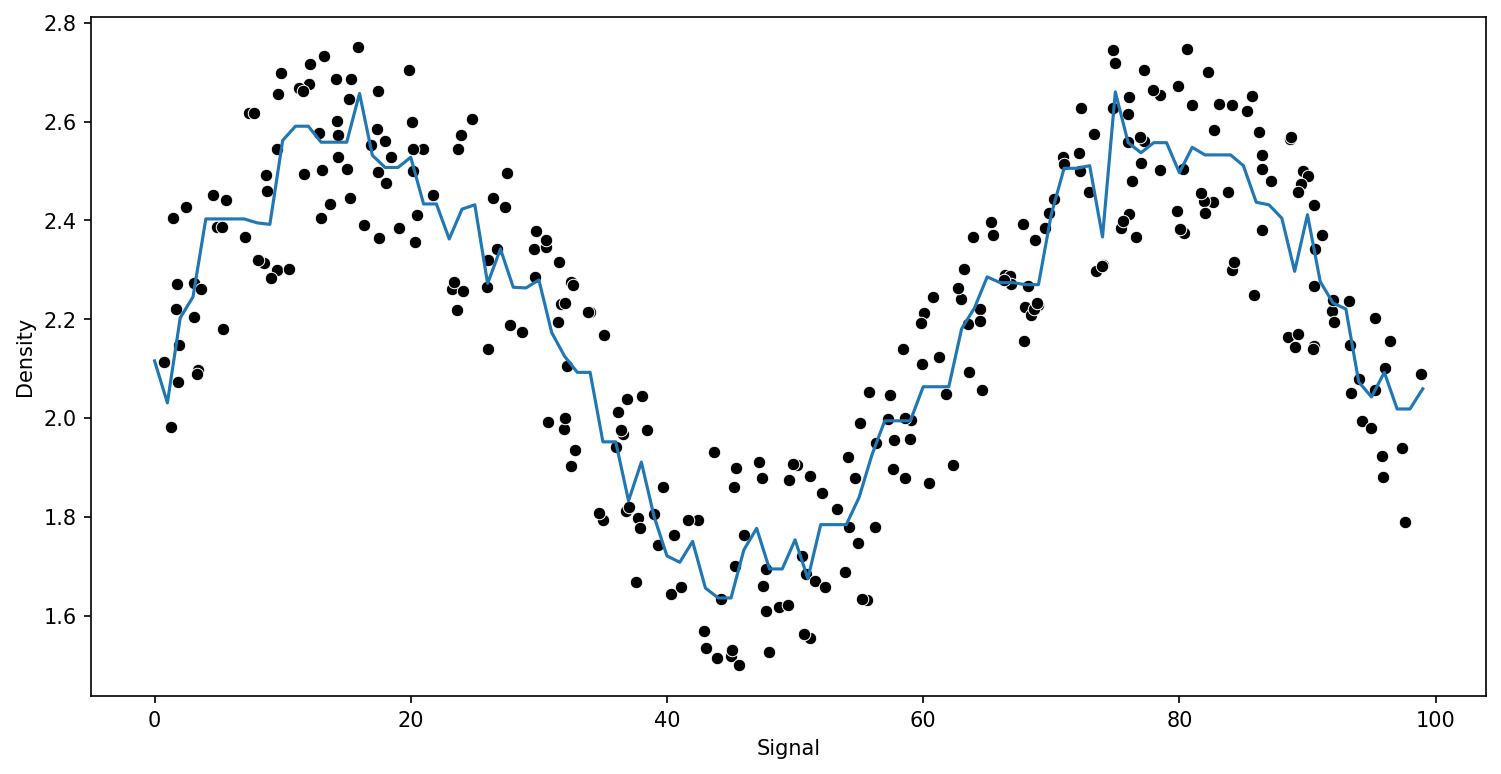

In [295]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----